In [278]:
import os
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

# Global AQ Stuff

In [279]:
os.chdir('./data/global/AQ')
global_files = os.listdir()
os.chdir('../../..')

In [280]:
global_df = pd.DataFrame()
for file in global_files:
    df = pd.read_csv('./data/global/AQ/'+file)
    df['source'] = file
    global_df = global_df.append(df)

In [281]:
# convert date objects to python datetimes
global_df.date = global_df.date.apply(lambda x:dt.datetime.strptime(x,"%Y/%m/%d"))

In [282]:
# remove whitespace from the column names
for col in global_df.columns:
    global_df=global_df.rename(columns={col:col.strip()})

In [283]:
metrics = ['co','no2','o3','pm10','pm25','so2']
for metric in metrics:
    global_df[metric] = global_df[metric].apply(lambda x:np.NaN if x == ' ' else float(x))

In [284]:
cols = ['co','no2','o3','pm10','pm25','so2','source']

In [285]:
cutoff = dt.datetime(2020,3,11)

In [286]:
pre_means = (global_df[global_df.date<cutoff])[cols].groupby('source').agg('mean')

In [287]:
post_means = (global_df[global_df.date>=cutoff])[cols].groupby('source').agg('mean')

# Corona Stuff

In [288]:
corona_df = pd.read_csv('./data/global/corona/time_series_covid19_confirmed_global.csv')

In [289]:
dates = ['1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20']
corona_cols = ['Province/State', 'Country/Region', 'Lat', 'Long']

In [290]:
corona_df = pd.melt(corona_df, id_vars = corona_cols, value_vars=dates, var_name='date')

In [291]:
#corona_df
corona_df.date = corona_df.date.apply(lambda x:dt.datetime.strptime(x,"%m/%d/%y"))

In [292]:
corona_countries = corona_df['Country/Region'].unique()

# Combine

In [293]:
corona_countries

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India

In [294]:
global_df.source.unique()

array(['beijing-air-quality.csv', 'berlin,-germany-air-quality.csv',
       'london-air-quality.csv',
       'los-angeles-north main street-air-quality.csv',
       'madrid-air-quality.csv',
       'msic-(mathscience innovation center), richmond, usa-air-quality.csv',
       'new-york, usa-air-quality.csv', 'paris-air-quality.csv',
       'wuhan-air-quality.csv'], dtype=object)

In [295]:
country_dict = {'beijing-air-quality.csv':'China',
'berlin,-germany-air-quality.csv':'Germany',
'london-air-quality.csv':'United Kingdom',
'los-angeles-north main street-air-quality.csv':'US',
'madrid-air-quality.csv':'Spain',
'msic-(mathscience innovation center), richmond, usa-air-quality.csv':'US',
'new-york, usa-air-quality.csv':'US',
'paris-air-quality.csv':'France',
'wuhan-air-quality.csv':'China'}

countries = ['China','Germany','United Kingdom','Spain','US','France']

In [296]:
global_df.source = global_df.source.replace(country_dict)

In [297]:
global_df[global_df.date>=min(corona_df.date)]

,co,no2,o3,pm10,pm25,so2,date,source
0,5.0,14.0,29.0,25.0,72.0,2.0,2020-03-02,China
1,4.0,6.0,25.0,15.0,80.0,1.0,2020-03-03,China
2,2.0,5.0,31.0,15.0,99.0,1.0,2020-03-04,China
3,4.0,12.0,35.0,44.0,47.0,2.0,2020-03-05,China
4,7.0,23.0,27.0,67.0,110.0,3.0,2020-03-06,China
...,...,...,...,...,...,...,...,...
82,7.0,9.0,33.0,55.0,137.0,2.0,2020-01-28,China
83,7.0,15.0,35.0,54.0,154.0,4.0,2020-01-29,China
84,8.0,20.0,42.0,55.0,154.0,4.0,2020-01-30,China
85,10.0,22.0,45.0,68.0,153.0,5.0,2020-01-31,China


In [298]:
corona_df_clean = corona_df[corona_df['Country/Region'].isin(countries)].groupby(['Country/Region','date']).aggregate('mean').reset_index()

In [299]:
global_df.dtypes

co               float64
no2              float64
o3               float64
pm10             float64
pm25             float64
so2              float64
date      datetime64[ns]
source            object
dtype: object

In [300]:
corona_df_clean.dtypes

Country/Region            object
date              datetime64[ns]
Lat                      float64
Long                     float64
value                    float64
dtype: object

In [323]:
Corona_AQ = pd.merge(global_df, corona_df_clean,  how='left', left_on=['source','date'], right_on = ['Country/Region','date'])

In [324]:
Corona_AQ = Corona_AQ.drop(columns=['Country/Region'])
Corona_AQ_2020 = Corona_AQ[Corona_AQ.date>min(corona_df.date)]

In [326]:
Corona_AQ_2020.to_csv('./data/global/corona_AQ_percountry_perdate_2020.csv')

In [371]:
Corona_AQ_2020[Corona_AQ.source=='Germany']

,co,no2,o3,pm10,pm25,so2,date,source,Lat,Long,value
2272,NaN,26.0,21.0,9.0,NaN,NaN,2020-03-02,Germany,51.0,9.0,159.0
2273,NaN,27.0,13.0,16.0,NaN,NaN,2020-03-03,Germany,51.0,9.0,196.0
2274,NaN,29.0,20.0,15.0,NaN,NaN,2020-03-04,Germany,51.0,9.0,262.0
2275,NaN,25.0,24.0,27.0,NaN,NaN,2020-03-05,Germany,51.0,9.0,482.0
2276,NaN,26.0,20.0,28.0,NaN,NaN,2020-03-06,Germany,51.0,9.0,670.0
...,...,...,...,...,...,...,...,...,...,...,...
2354,NaN,21.0,22.0,37.0,NaN,NaN,2020-01-28,Germany,51.0,9.0,4.0
2355,NaN,18.0,22.0,14.0,NaN,NaN,2020-01-29,Germany,51.0,9.0,4.0
2356,NaN,24.0,21.0,14.0,NaN,NaN,2020-01-30,Germany,51.0,9.0,4.0
2357,NaN,25.0,19.0,16.0,NaN,NaN,2020-01-31,Germany,51.0,9.0,5.0


# Plots

In [366]:
countries

['China', 'Germany', 'United Kingdom', 'Spain', 'US', 'France']

In [376]:
Corona_AQ_2020[Corona_AQ_2020.source=='China']

,co,no2,o3,pm10,pm25,so2,date,source,Lat,Long,value
0,5.0,14.0,29.0,25.0,72.0,2.0,2020-03-02,China,32.828385,111.649082,2428.363636
1,4.0,6.0,25.0,15.0,80.0,1.0,2020-03-03,China,32.828385,111.649082,2432.151515
2,2.0,5.0,31.0,15.0,99.0,1.0,2020-03-04,China,32.828385,111.649082,2435.939394
3,4.0,12.0,35.0,44.0,47.0,2.0,2020-03-05,China,32.828385,111.649082,2440.515152
4,7.0,23.0,27.0,67.0,110.0,3.0,2020-03-06,China,32.828385,111.649082,2445.151515
...,...,...,...,...,...,...,...,...,...,...,...
17673,7.0,9.0,33.0,55.0,137.0,2.0,2020-01-28,China,32.828385,111.649082,166.939394
17674,7.0,15.0,35.0,54.0,154.0,4.0,2020-01-29,China,32.828385,111.649082,184.454545
17675,8.0,20.0,42.0,55.0,154.0,4.0,2020-01-30,China,32.828385,111.649082,246.696970
17676,10.0,22.0,45.0,68.0,153.0,5.0,2020-01-31,China,32.828385,111.649082,297.030303


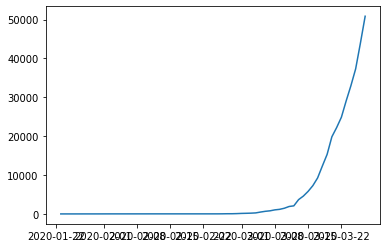

In [372]:
per_country = Corona_AQ_2020[Corona_AQ_2020.source=='Germany'][['date','value']].sort_values(by='date').dropna().reset_index()
plt.plot(per_country.date,per_country.value)

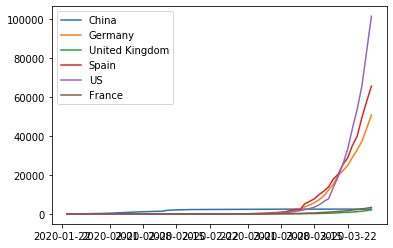

In [370]:
for country in countries:
    per_country = Corona_AQ_2020[Corona_AQ_2020.source==country][['date','value']].sort_values(by='date').dropna().reset_index()
    plt.plot(per_country.date,per_country.value)
plt.legend(countries)